In [1]:
# Import required libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle 

In [2]:
# Access the training and testing data from csv file

train_data = pd.read_csv(r"C:\Users\Administrator\Downloads\IBM_CODE\Training_data.csv")
test_data = pd.read_csv(r"C:\Users\Administrator\Downloads\IBM_CODE\Testing_data.csv")

In [3]:
# To list the first five rows of the dataframes

train_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
test_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [5]:
# To get the short summary of the training data

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [6]:
# Description about "Number of orders"

train_data['num_orders'].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

In [7]:
# To count null values of each column

train_data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [8]:
# To import food items and fulfilment centers csv files

food_data=pd.read_csv(r"C:\Users\Administrator\Downloads\IBM_CODE\fooditems_data.csv")
centers_data=pd.read_csv(r"C:\Users\Administrator\Downloads\IBM_CODE\centers_data.csv")

In [9]:
# Merge the training data with food data

final_train = pd.merge(train_data,food_data,on="meal_id",how="outer")

# Update the content of final training data with fulfilment centers data

final_train = pd.merge(final_train,centers_data,on="center_id",how="outer")
final_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [10]:
# To delete the meal_id and center_id from final training data

final_train = final_train.drop(['center_id','meal_id'],axis=1)
final_train.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [11]:
# To get the list of column names from the dataframe

columns = final_train.columns.tolist()
columns = columns[:2]+columns[9:]+columns[7:9]+columns[2:7]
print(columns)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [12]:
# To list the datatypes of each column in final training data

final_train.dtypes

id                         int64
week                       int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
dtype: object

In [13]:
# To convert labels into numerical values(machine-readable form)

le = LabelEncoder()
final_train['center_type'] = le.fit_transform(final_train['center_type'])
final_train['category'] = le.fit_transform(final_train['category'])
final_train['cuisine'] = le.fit_transform(final_train['cuisine'])
final_train.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,0,3,647,56,2,2.0
1,1018704,2,135.83,152.29,0,0,323,0,3,647,56,2,2.0
2,1196273,3,132.92,133.92,0,0,96,0,3,647,56,2,2.0
3,1116527,4,135.86,134.86,0,0,163,0,3,647,56,2,2.0
4,1343872,5,146.50,147.50,0,0,215,0,3,647,56,2,2.0


In [14]:
# To return the tuples in the dataframe

final_train.shape

(456548, 13)

Text(0, 0.5, 'Number of Buyers')

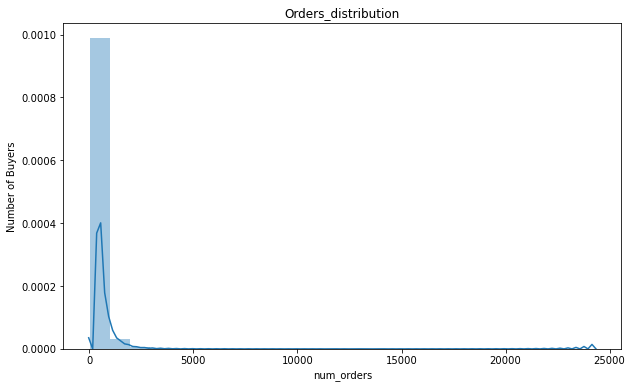

In [15]:
# To depict the data variations

plt.figure(figsize=(10,6))
sns.distplot(final_train.num_orders,bins=25)
plt.title("Orders_distribution")
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")


In [16]:

final_train2 = final_train.drop(['id'],axis=1)

# To find the correlation of columns 

correlation = final_train2.corr(method='pearson')
cols = correlation.nlargest(8,'num_orders').index
cols

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

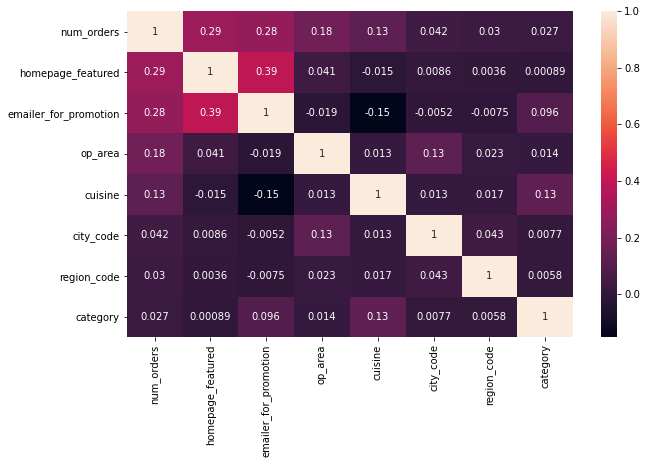

In [17]:
correlation_mat = np.corrcoef(final_train2[cols].values.T)

# To visualize how well features correlate with each other

plt.figure(figsize=(10,6))
Heat_map = sns.heatmap(correlation_mat,annot=True,yticklabels=cols.values,xticklabels=cols.values)
plt.show()


In [18]:
# To delete the 'num_orders' column

features = cols.drop(['num_orders'])
final_train3 = final_train[features]
final_train3.head()

,homepage_featured,emailer_for_promotion,op_area,cuisine,city_code,region_code,category
0,0,0,2.0,3,647,56,0
1,0,0,2.0,3,647,56,0
2,0,0,2.0,3,647,56,0
3,0,0,2.0,3,647,56,0
4,0,0,2.0,3,647,56,0


In [19]:
# Split the dataset into train and test data

X = final_train3.values
Y = final_train['num_orders'].values
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size=0.25)